In [102]:
#Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()
sns.set_style('white')

In [105]:
mathsIQ_60 = pandas.read_csv('data/mathsIQ_60.csv')
mathsIQ_30k = pandas.read_csv('data/mathsIQ_30k.csv')


In [106]:
mathsIQ_60.mean()

ID_code    536734.666667
IQ            104.600000
dtype: float64

In [107]:
mathsIQ_30k.mean()

ID_code    549210.362333
IQ            103.072600
dtype: float64

In [108]:
n=60
stats.norm.cdf(mathsIQ_30k.mean(), mathsIQ_60.mean(), (mathsIQ_60.std()/(n**0.5)))

array([0.63875394, 0.14896124])

In [109]:
stats.norm.cdf(mathsIQ_60.mean(), mathsIQ_30k.mean(), (mathsIQ_60.std()/(n**0.5)))

array([0.36124606, 0.85103876])

104.6
11.366319559953567


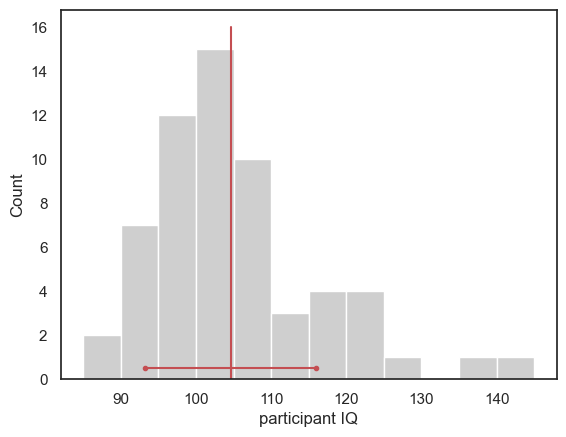

In [110]:
sns.histplot(mathsIQ_60['IQ'], bins=range(85,150,5), color=[0.75,0.75,0.75]).set(xlabel='participant IQ')
m=mathsIQ_60['IQ'].mean()
plt.plot([m,m],[0,16],'r')
s=mathsIQ_60['IQ'].std()
plt.plot([m-s,m+s],[0.5,0.5],'r.-')

print(m)
print(s)

103.0726
9.95302121607849


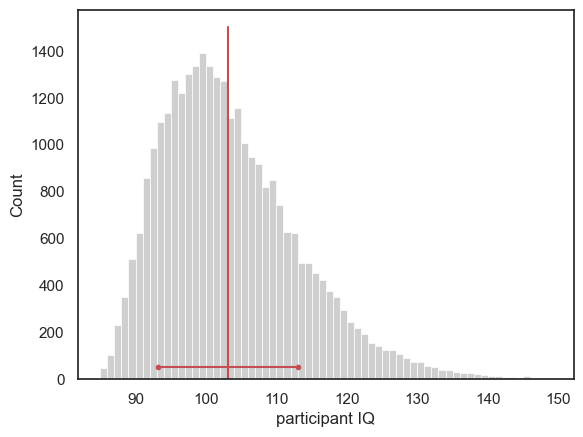

In [111]:
sns.histplot(mathsIQ_30k['IQ'], bins=range(85,150,1), color=[0.75,0.75,0.75]).set(xlabel='participant IQ')
m=mathsIQ_30k['IQ'].mean()
plt.plot([m,m],[0,1500],'r')
s=mathsIQ_30k['IQ'].std()
plt.plot([m-s,m+s],[50,50],'r.-')

print(m)
print(s)

In [151]:
nReps=10000
m=np.empty(nReps)
n=60

for i in range(nReps):
    sample = mathsIQ_30k['IQ'].sample(n)
    m[i]=sample.mean()



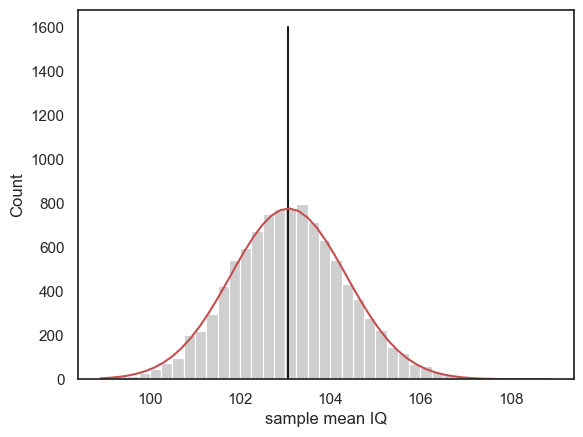

In [152]:
sns.histplot(m, bins=np.arange(99,109,0.25), color=[0.75,0.75,0.75]).set(xlabel='sample mean IQ')
plt.plot([mathsIQ_30k['IQ'].mean(), mathsIQ_30k['IQ'].mean()],[0, 1600],'k')
#plt.plot([mathsIQ_60['IQ'].mean(), mathsIQ_60['IQ'].mean()],[0, 1000],'r--')

x = np.arange(98.9,109.1,0.2)
mu=mathsIQ_30k['IQ'].mean()
sgm=mathsIQ_30k['IQ'].std()
n=60
p=stats.norm.pdf(x,mu,sgm/(n**0.5))
freq=p*nReps*0.25
plt.plot(x,freq,'r')

0.101

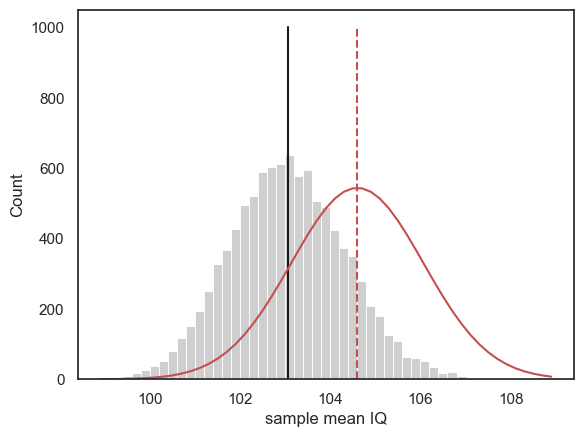

In [116]:
sns.histplot(m, bins=np.arange(99,109,0.2), color=[0.75,0.75,0.75]).set(xlabel='sample mean IQ')
plt.plot([mathsIQ_30k['IQ'].mean(), mathsIQ_30k['IQ'].mean()],[0, 1000],'k')
plt.plot([mathsIQ_60['IQ'].mean(), mathsIQ_60['IQ'].mean()],[0, 1000],'r--')

x = np.arange(98.9,109.1,0.2)
freq = stats.norm.pdf(x, mathsIQ_60['IQ'].mean(), mathsIQ_60['IQ'].std()/(n**0.5)) * nReps * 0.2

plt.plot(x,freq,'r')
(m>104.7).mean()


0.101

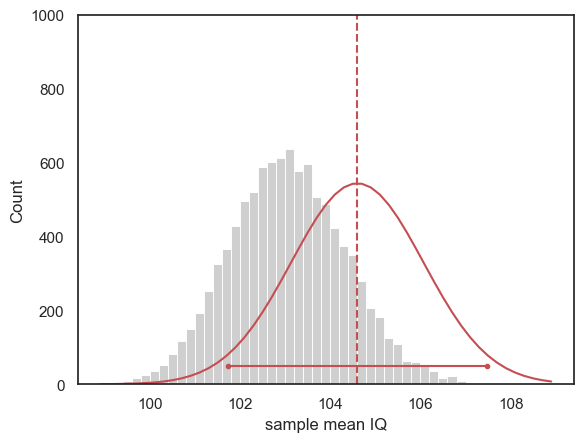

In [128]:
sns.histplot(m, bins=np.arange(99,109,0.2), color=[0.75,0.75,0.75]).set(xlabel='sample mean IQ')
plt.plot([mathsIQ_60['IQ'].mean(), mathsIQ_60['IQ'].mean()],[0, 1000],'r--')
plt.plot([mathsIQ_60['IQ'].mean()-1.96*mathsIQ_60['IQ'].std()/(n**0.5),mathsIQ_60['IQ'].mean()+1.96*mathsIQ_60['IQ'].std()/(n**0.5)],[50,50],'r.-')

x = np.arange(98.9,109.1,0.2)
freq = stats.norm.pdf(x, mathsIQ_60['IQ'].mean(), mathsIQ_60['IQ'].std()/(n**0.5)) * nReps * 0.2

plt.ylim([0,1000])
plt.plot(x,freq,'r')
(m>104.7).mean()

In [129]:
print(mathsIQ_60['IQ'].mean()-1.96*(mathsIQ_60['IQ'].std()/(60**0.5)))
print(mathsIQ_60['IQ'].mean()+1.96*(mathsIQ_60['IQ'].std()/(60**0.5)))

101.72392433092637
107.47607566907362


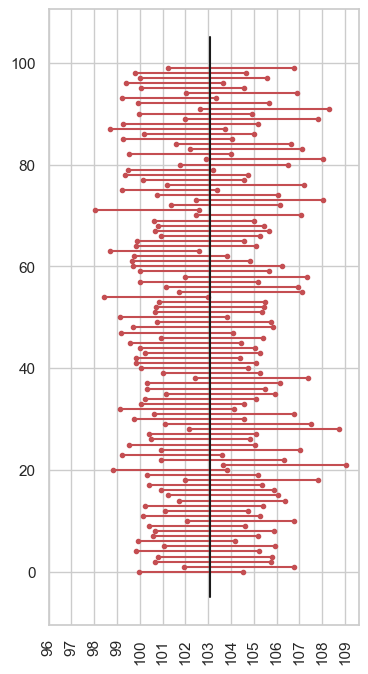

In [59]:
sns.set_style('whitegrid')



nReps=100
n=60
m=np.empty(nReps)
s=np.empty(nReps)

plt.figure(figsize=[4,8])

for i in range(nReps):
    sample = mathsIQ_30k['IQ'].sample(n)
    m[i]=sample.mean()
    s[i]=sample.std()
    plt.plot([m[i]-1.96*s[i]/(n**0.5),m[i]+1.96*s[i]/(n**0.5)],[i,i],'r.-')

plt.plot([mathsIQ_30k['IQ'].mean(),mathsIQ_30k['IQ'].mean()],[0-5,nReps+5],'k')
plt.xticks(np.arange(96,110),rotation=90)
plt.show()

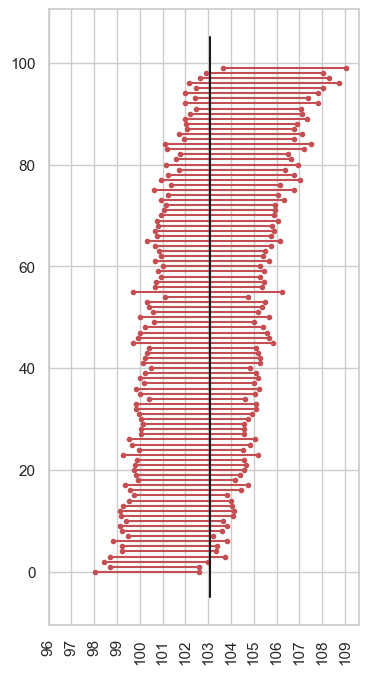

In [78]:
plt.figure(figsize=[4,8])
ix=np.argsort(m)

for i in range(nReps):
    plt.plot([m[ix[i]]-1.96*s[ix[i]]/(n**0.5),m[ix[i]]+1.96*s[ix[i]]/(n**0.5)],[i,i],'r.-')

plt.plot([mathsIQ_30k['IQ'].mean(),mathsIQ_30k['IQ'].mean()],[0-5,nReps+5],'k')
plt.xticks(np.arange(96,110),rotation=90)
plt.show()

In [75]:
CI[np.argsort(m)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [130]:
tmp=((mathsIQ_30k['IQ']-mathsIQ_30k['IQ'].mean())*2)+mathsIQ_30k['IQ'].mean()

103.0726
9.95302121607849


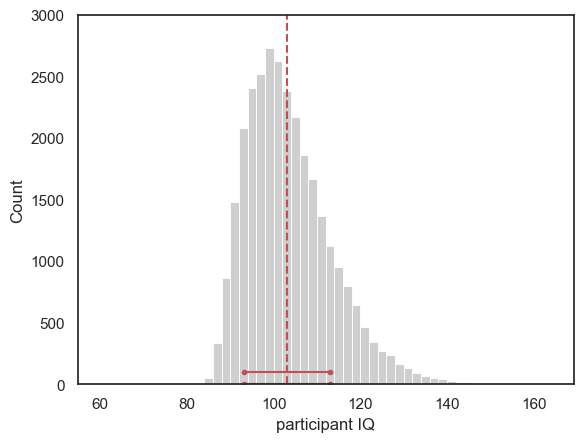

In [145]:
sns.histplot(mathsIQ_30k['IQ'], bins=range(60,165,2), color=[0.75,0.75,0.75]).set(xlabel='participant IQ')
m=mathsIQ_30k['IQ'].mean()
plt.plot([m,m],[0,16],'r')
s=mathsIQ_30k['IQ'].std()
plt.plot([m-s,m+s],[0.5,0.5],'r.-')
plt.ylim([0,3000])
n=60
plt.plot([mathsIQ_30k['IQ'].mean(), mathsIQ_30k['IQ'].mean()],[0, 3000],'r--')
plt.plot([mathsIQ_30k['IQ'].mean()-mathsIQ_30k['IQ'].std(),mathsIQ_30k['IQ'].mean()+mathsIQ_30k['IQ'].std()],[100,100],'r.-')


print(m)
print(s)

103.07259999995794
19.90604243215784


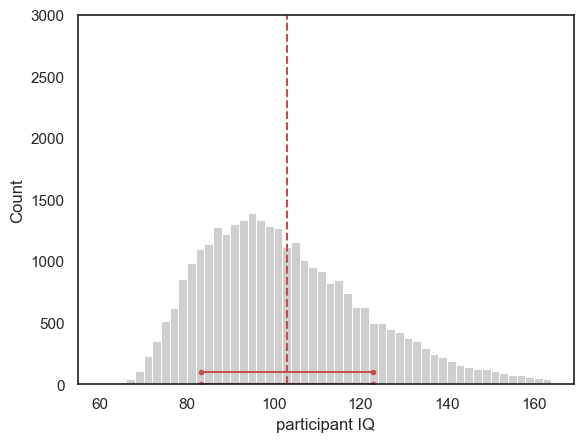

In [147]:
sns.histplot(tmp, bins=range(60,165,2), color=[0.75,0.75,0.75]).set(xlabel='participant IQ')
m=tmp.mean()
plt.plot([m,m],[0,16],'r')
s=tmp.std()
plt.plot([m-s,m+s],[0.5,0.5],'r.-')
plt.ylim([0,3000])
plt.plot([tmp.mean(), tmp.mean()],[0, 3000],'r--')
plt.plot([tmp.mean()-tmp.std(),tmp.mean()+tmp.std()],[100,100],'r.-')

print(m)
print(s)

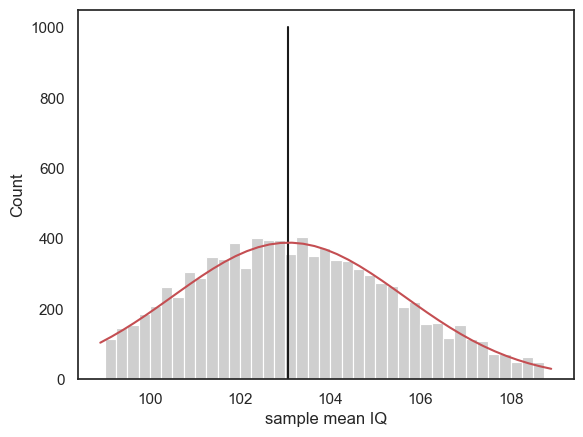

In [140]:
nReps=10000
m=np.empty(nReps)
n=60

for i in range(nReps):
    sample = tmp.sample(n)
    m[i]=sample.mean()


sns.histplot(m, bins=np.arange(99,109,0.25), color=[0.75,0.75,0.75]).set(xlabel='sample mean IQ')
plt.plot([tmp.mean(), tmp.mean()],[0, 1000],'k')
#plt.plot([mathsIQ_60['IQ'].mean(), mathsIQ_60['IQ'].mean()],[0, 1000],'r--')

x = np.arange(98.9,109.1,0.25)
mu=tmp.mean()
sgm=tmp.std()
n=60
p=stats.norm.pdf(x,mu,sgm/(n**0.5))
freq=p*nReps*0.25
plt.plot(x,freq,'r')

In [230]:
h = np.random.normal(164,7,100000)

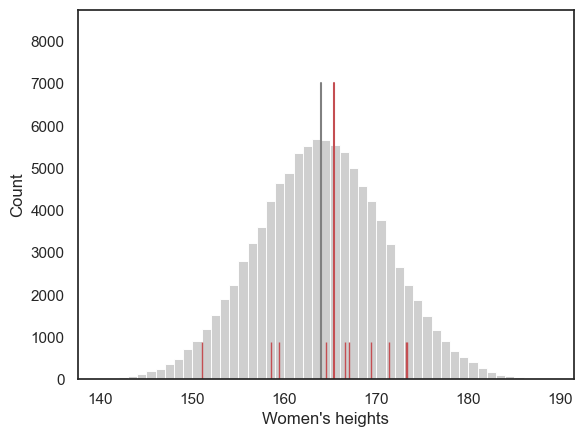

In [237]:

sns.histplot(h, bins=np.arange(140,190,1), color=[0.75,0.75,0.75]).set(xlabel="Women's heights")
sample=np.random.choice(h,10,replace=False)
sns.rugplot(sample, height=0.1, color='r')

mu=h.mean()
sigma=h.std()
plt.plot([mu,mu],[0,7000],color=[0.5,0.5,0.5])

m=sample.mean()
s=sample.std()
plt.plot([m,m],[0,7000],color='r')

In [233]:
nReps=10000
mm=np.empty(nReps)
si=np.empty(nReps)
n=10

for i in range(nReps):
    samplei = np.random.choice(h,n,replace=False)
    mm[i]=samplei.mean()
    si[i]=samplei.std()



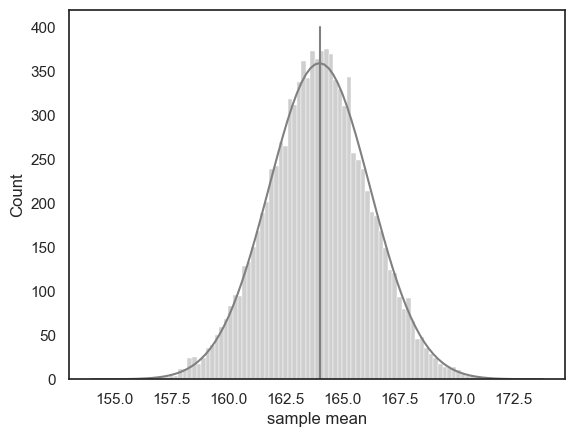

In [240]:
binwidth=0.2
sns.histplot(mm, bins=np.arange(154,174,binwidth), color=[0.75,0.75,0.75])

x=np.arange(154,174,binwidth)
p=stats.norm.pdf(x, mu, sigma/(n**0.5))
freq = p*nReps*binwidth

plt.plot(x,freq,color=[0.5,0.5,0.5])
plt.plot([mu,mu],[0,400],color=[0.5,0.5,0.5])
plt.xlabel('sample mean')

plt.show()

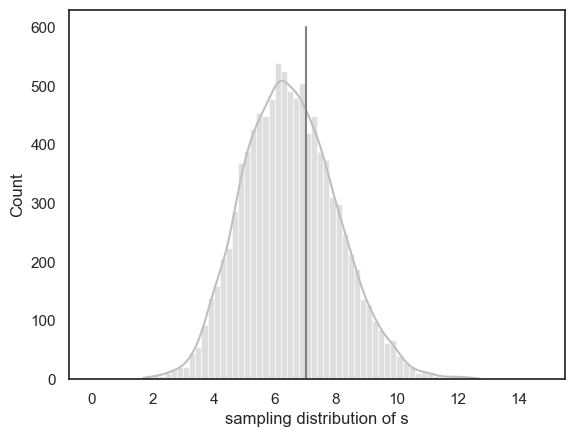

In [247]:
binwidth=0.2
sns.histplot(si, bins=np.arange(0,15,binwidth), color=[0.75,0.75,0.75],kde=True)



plt.plot([sigma,sigma],[0,600],color=[0.5,0.5,0.5])
plt.xlabel('sampling distribution of s')
plt.show()

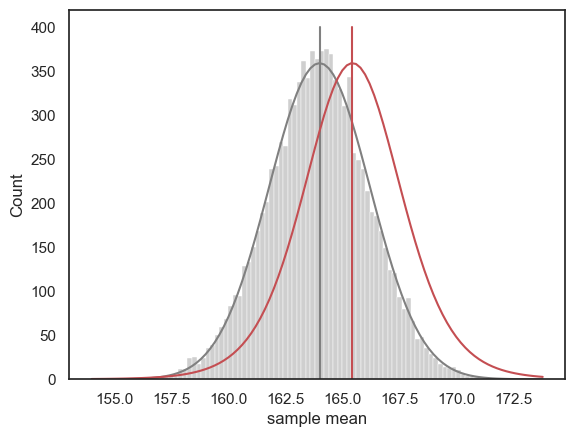

In [241]:
binwidth=0.2
sns.histplot(mm, bins=np.arange(154,174,binwidth), color=[0.75,0.75,0.75])

x=np.arange(154,174,binwidth)
p=stats.norm.pdf(x, mu, sigma/(n**0.5))
freq = p*nReps*binwidth

plt.plot(x,freq,color=[0.5,0.5,0.5])
plt.plot([mu,mu],[0,400],color=[0.5,0.5,0.5])

#sample=np.random.choice(h,10,replace=False)
m=sample.mean()
s=sample.std()

x=np.arange(154,174,binwidth)
t=stats.t.pdf(x, n-1, m, s/(n**0.5))
freq = t*nReps*binwidth

plt.plot(x,freq,color='r')
plt.plot([m,m],[0,400],color='r')

plt.xlabel('sample mean')

plt.show()

In [202]:
s


6.825367541218218

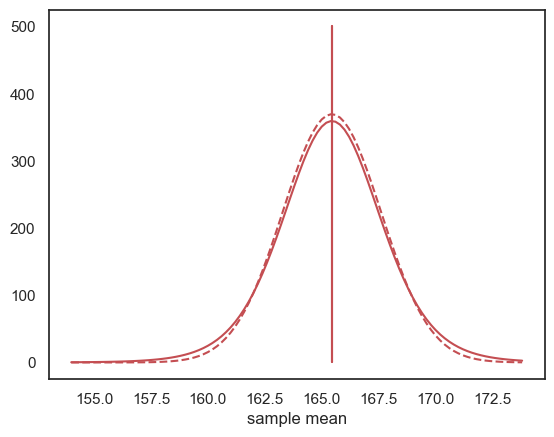

In [246]:
x=np.arange(154,174,binwidth)


y=stats.norm.pdf(x, m, s/(n**0.5))
freq = y*nReps*binwidth

plt.plot(x,freq,'r--')

t=stats.t.pdf(x, n-1, m, s/(n**0.5))
freq = t*nReps*binwidth

plt.plot(x,freq,color='r')
plt.plot([m,m],[0,500],color='r')
    
plt.plot([m,m],[0,500],color='r')

plt.xlabel('sample mean')

plt.show()

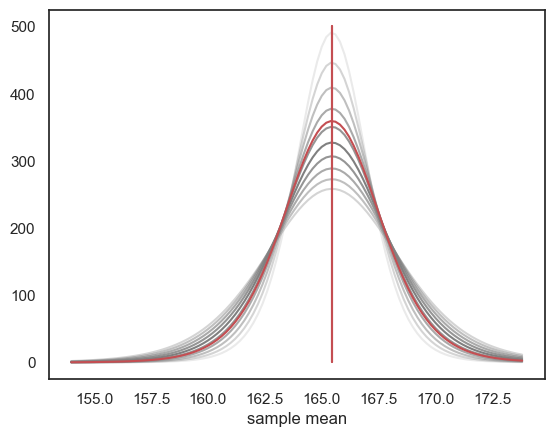

In [248]:
x=np.arange(154,174,binwidth)

for ss in np.arange(5,10,0.5):
    t=stats.t.pdf(x, n-1, m, ss/(n**0.5))
    freq = t*nReps*binwidth

    plt.plot(x,freq,color=[0.5,0.5,0.5],alpha=1-(abs(ss-7.5)/3))

t=stats.t.pdf(x, n-1, m, s/(n**0.5))
freq = t*nReps*binwidth

plt.plot(x,freq,color='r')
plt.plot([m,m],[0,500],color='r')
plt.xlabel('sample mean')

    
plt.plot([m,m],[0,500],color='r')

<AxesSubplot:xlabel='score', ylabel='Count'>

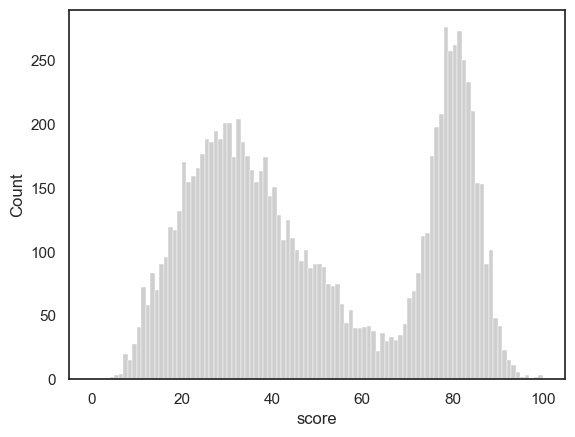

In [249]:
UKBrexdex=pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/UKBrexdex.csv')
sns.histplot(UKBrexdex['score'], bins=range(101), color=[0.75,0.75,0.75])

Text(0.5, 0, 'score')

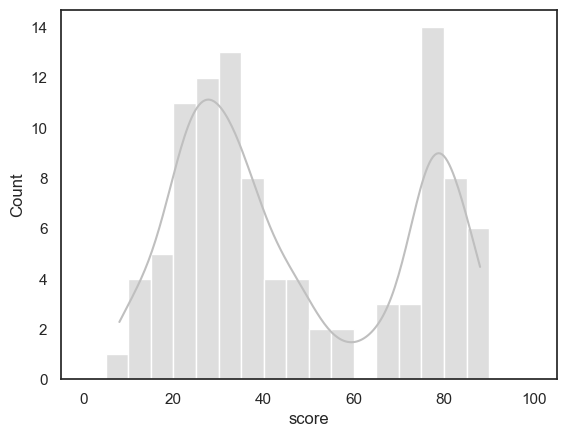

In [261]:
sample=np.random.choice(UKBrexdex['score'],100)
sns.histplot(sample, bins=range(0,101,5), color=[0.75,0.75,0.75], kde=True, kde_kws={'bw_adjust': 0.5})
plt.xlabel('score')

In [280]:
simd=stats.gaussian_kde(sample).resample(10000)
simd[0]

array([31.91316655, 44.79063555, 80.3388749 , ...,  1.35064808,
       61.14513037,  0.72765954])

Text(0.5, 0, 'score')

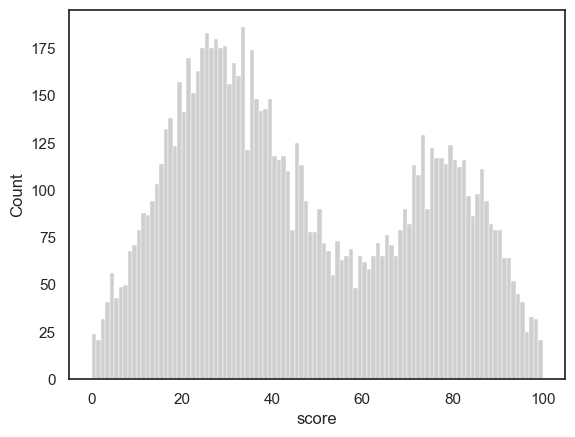

In [282]:
sns.histplot(simd[0], bins=range(101), color=[0.75,0.75,0.75])
plt.xlabel('score')

Text(0.5, 0, 'score')

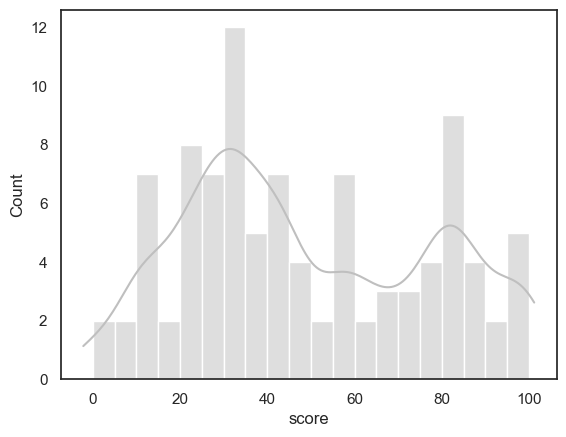

In [287]:
resample = np.random.choice(simd[0],100)
sns.histplot(resample, bins=range(0,101,5), color=[0.75,0.75,0.75], kde=True, kde_kws={'bw_adjust': 0.5})
plt.xlabel('score')

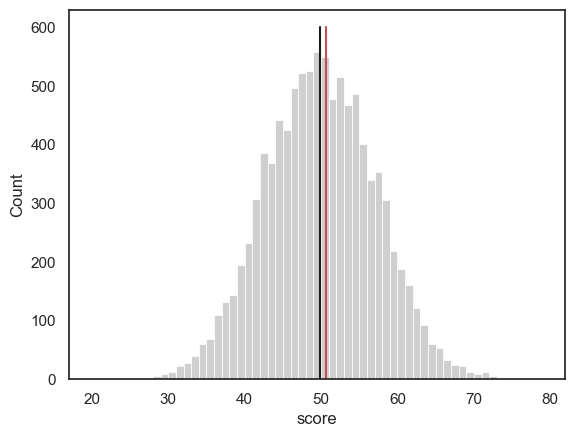

In [304]:
nReps=10000
m=np.empty(nReps)

for i in range(nReps):
    sample=np.random.choice(UKBrexdex['score'],12)
    m[i]=sample.mean()

sns.histplot(m, bins=np.arange(20,80,1), color=[0.75,0.75,0.75])
plt.xlabel('score')

mu=UKBrexdex['score'].mean()
m=thissample.mean()


plt.plot([mu,mu],[0,600],'k')
plt.plot([m,m],[0,600],'r')

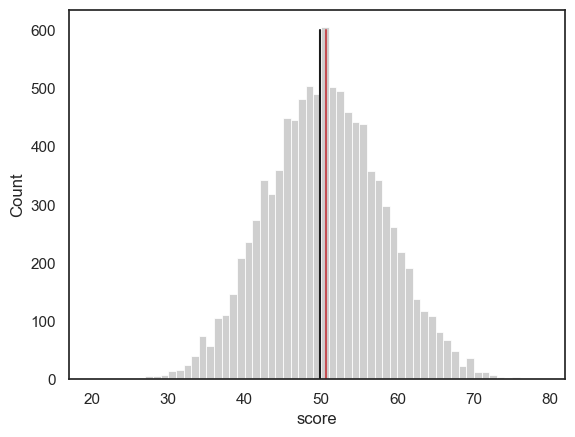

In [306]:
nReps=10000
m=np.empty(nReps)
#thissample=np.random.choice(UKBrexdex['score'],100)
    
for i in range(nReps):
    resample=np.random.choice(thissample,12,replace=True)
    m[i]=resample.mean()

sns.histplot(m, bins=np.arange(20,80,1), color=[0.75,0.75,0.75])
plt.xlabel('score')

plt.plot([mu,mu],[0,600],'k')
plt.plot([thissample.mean(),thissample.mean()],[0,600],'r')

plt.show()